In [147]:
import os
import pandas as pd
import numpy as np
from astropy import units as u
from astropy.time import Time
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
%matplotlib widget

#######################################################################################################
### read ACC SF result file
#######################################################################################################
SF_data = pd.read_csv('/Users/87steven/Documents/ASIAA/ACC variability new/ACC SF result.csv')

SF_name = SF_data.name
D1000_3 = SF_data.D1000_3.values
D1000_uperr_3 = SF_data.D1000_uperr_3.values
D1000_lowerr_3 = SF_data.D1000_lowerr_3.values
D1000_6 = SF_data.D1000_6.values
D1000_uperr_6 = SF_data.D1000_uperr_6.values
D1000_lowerr_6 = SF_data.D1000_lowerr_6.values
D1000_7 = SF_data.D1000_7.values
D1000_uperr_7 = SF_data.D1000_uperr_7.values
D1000_lowerr_7 = SF_data.D1000_lowerr_7.values
tauchar_3 = SF_data.tau_char_3.values
tauchar_uperr_3 = SF_data.tauchar_uperror_3.values
tauchar_lowerr_3 = SF_data.tauchar_lowerror_3.values
tauchar_6 = SF_data.tau_char_6.values
tauchar_uperr_6 = SF_data.tauchar_uperror_6.values
tauchar_lowerr_6= SF_data.tauchar_lowerror_6.values
tauchar_7 = SF_data.tau_char_7.values
tauchar_uperr_7 = SF_data.tauchar_uperror_7.values
tauchar_lowerr_7 = SF_data.tauchar_lowerror_7.values
l = SF_data.gla_l.values
b = SF_data.gla_b.values
SF_z = SF_data.z.values
size_2 = SF_data.theta_2.values
size_5 = SF_data.theta_5.values
size_8 = SF_data.theta_8.values
size_15 = SF_data.theta_15.values
size_24 = SF_data.theta_24.values
size_43 = SF_data.theta_43.values
#######################################################################################################
### convert apparent source size to actural source size
act_size_2 = size_2*(1+SF_z)
act_size_5 = size_5*(1+SF_z)
act_size_8 = size_8*(1+SF_z)
act_size_15 = size_15*(1+SF_z)
act_size_24 = size_24*(1+SF_z)
act_size_43 = size_43*(1+SF_z)

### convert characteristic timescale to actual timescale
tausrc_3 = tauchar_3*(1+SF_z)
tausrc_6 = tauchar_6*(1+SF_z)
tausrc_7 = tauchar_7*(1+SF_z)

tausrc_uperr_3 = tauchar_uperr_3*(1+SF_z)
tausrc_uperr_6 = tauchar_uperr_6*(1+SF_z)
tausrc_uperr_7 = tauchar_uperr_7*(1+SF_z)

tausrc_lowerr_3 = tauchar_lowerr_3*(1+SF_z)
tausrc_lowerr_6 = tauchar_lowerr_6*(1+SF_z)
tausrc_lowerr_7 = tauchar_lowerr_7*(1+SF_z)

#######################################################################################################
### read spectra index file
#######################################################################################################
specind = pd.read_csv('/Users/87steven/Documents/ASIAA/ACC variability/spectral index.csv')

specind_Name = specind.Name
RA = specind.RA
DEC = specind.DEC
z = specind.z
cla = specind.class_name
alpha = specind.alpha
alphaRad = specind.alphaRad
alphaK = specind.alphaK
alphaRadK = specind.alphaRadK

#######################################################################################################
### find overlap sources of SF file (# = 40) and spectral index file (BZCAT Xmatch ACC, # = 1367)
#######################################################################################################
namelist = list(set(SF_name))
name_index = [[np.nan]*1]*len(namelist) 
# put index of each source into an array
for i in range(0, len(namelist)):
    name_index[i] =  np.where( (specind_Name == namelist[i]).values == True )[0][0]
# extract value of overlap sources
alpha_over = alpha[ name_index ].values
alphaRad_over = alphaRad[ name_index ].values
alphaK_over = alphaK[ name_index ].values
alphaRadK_over = alphaRadK[ name_index ].values

#######################################################################################################
classnameall = []
QSOind = []
BL_Lac_can_ind = []
BL_Lac_galaxy_dom_ind = []
BL_Lac_ind = []
Blazar_ind = []
classclassify = [Blazar_ind, BL_Lac_can_ind, BL_Lac_galaxy_dom_ind, QSOind, BL_Lac_ind]
# there is a blank in "Blazar Uncertain type" 
# NOT REMOVE IT
classnameall  = [' Blazar Uncertain type', ' BL Lac Candidate', ' BL Lac-galaxy dominated', ' QSO RLoud flat radio sp.', ' BL Lac'] 
    
for j in range(0, 5): # 1367
    classclassify[j] = np.where( cla.values == classnameall[j] )[0]
        
#######################################################################################################
z_overlap = np.array(z[ name_index ])

z1 = np.where((0 < z_overlap) & (z_overlap < 1))[0]
z2 = np.where((z_overlap >= 1) & (z_overlap < 2))[0]
z3 = np.where(z_overlap >= 2)[0]
z4 = np.where((0 < z_overlap) & (z_overlap < 1.5))[0]
z5 = np.where(z_overlap >= 1.5)[0]

zsep = [z1, z2, z3, z4, z5]

zsepname = ['0<z<1, N = '+str(len(z1)), '1$\leq$z<2, N = '+str(len(z2)), 'z$\geq$2, N = '+str(len(z3)), '0<z<1.5, N = '+str(len(z4)), 'z$\geq$1.5, N = '+str(len(z5))]
#######################################################################################################
### read modulation index file
#######################################################################################################
moduind = pd.read_csv('/Users/87steven/Documents/ASIAA/ACC variability/modulation index_ge30.csv')

moduind_Name = moduind.Name
modu_index_3 = moduind.modu_index_3
modu_index_6 = moduind.modu_index_6
modu_index_7 = moduind.modu_index_7

#######################################################################################################
### find overlap sources of SF file (# = 40) and modulation index file (# = 1367)
#######################################################################################################
namelist = list(set(SF_name))
name_index = [[np.nan]*1]*len(namelist) 
# put index of each source into an array
for i in range(0, len(namelist)):
    name_index[i] =  np.where( (moduind_Name == namelist[i]).values == True )[0][0]
# extract value of overlap sources
modu_index_3_over = modu_index_3[ name_index ].values
modu_index_6_over = modu_index_6[ name_index ].values
modu_index_7_over = modu_index_7[ name_index ].values

#######################################################################################################
### defind parameter array
#######################################################################################################
color = ['red', 'green', 'blue', 'orange', 'black', 'pink', 'gray']
label_name = ['band 3', 'band 6', 'band 7']
Band_num = [3, 6, 7]


In [ ]:
#######################################################################################################
### Redshift against Modulation index
#######################################################################################################
modu_index = [modu_index_3, modu_index_6, modu_index_7]

for k in range(0, 3):

    aa = ~np.isnan(z) & ~np.isnan(modu_index[k])
    notnan = np.where(aa == True)[0]
    
    notnan_z = z[notnan]
    notnan_modu_index = modu_index[k][notnan].values
     
    tau, p = stats.kendalltau(notnan_z, notnan_modu_index)
    
    plt.rcParams['figure.figsize'] = [10, 7.5]
    plt.rcParams['axes.linewidth'] = 3    
    fig, ax = plt.subplots()
    
    ax.plot(notnan_z, notnan_modu_index, '.', c = 'red', markersize = 6)
    
    ax.text(0.1, np.nanmax(notnan_modu_index), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), 
            verticalalignment = 'top', fontsize = 12)

    ax.set_xlim(-0.1, np.nanmax(notnan_z)*1.1)
    ax.set_ylim(0, np.nanmax(notnan_modu_index)*1.1)
    plt.xlabel('Redshift (z)',  fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.ylabel('Modulation Index',  fontsize = 16)
    plt.yticks(fontsize = 14)
    plt.title('Band '+str(Band_num[k])+' Modulation Index \nAgainst Redshift of All Sources', fontsize = 20)


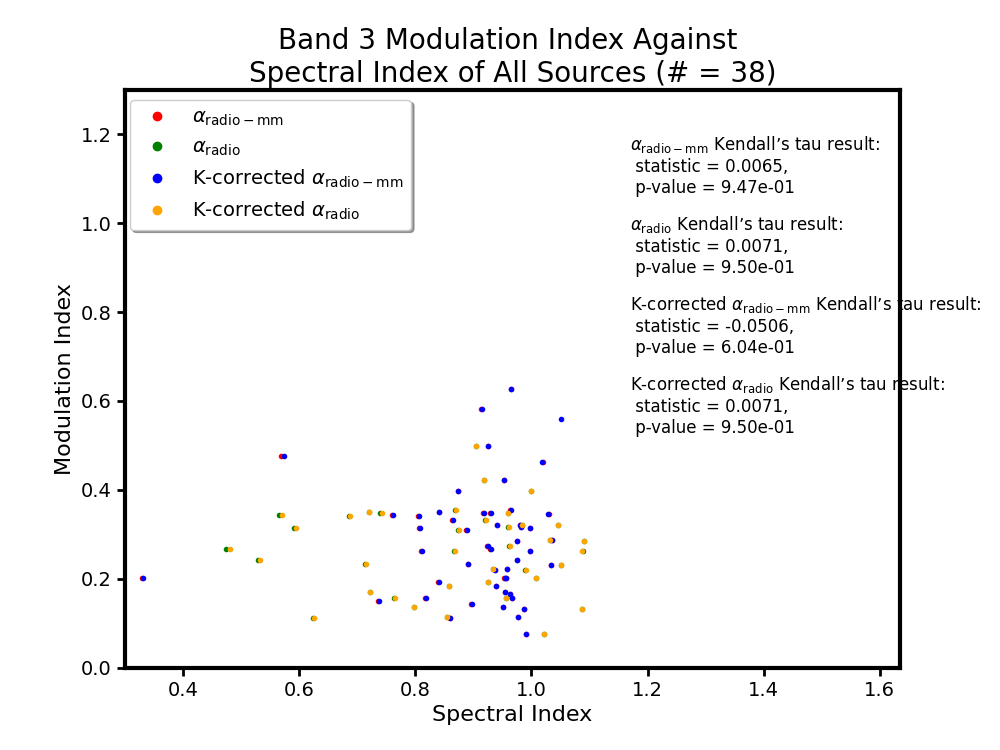

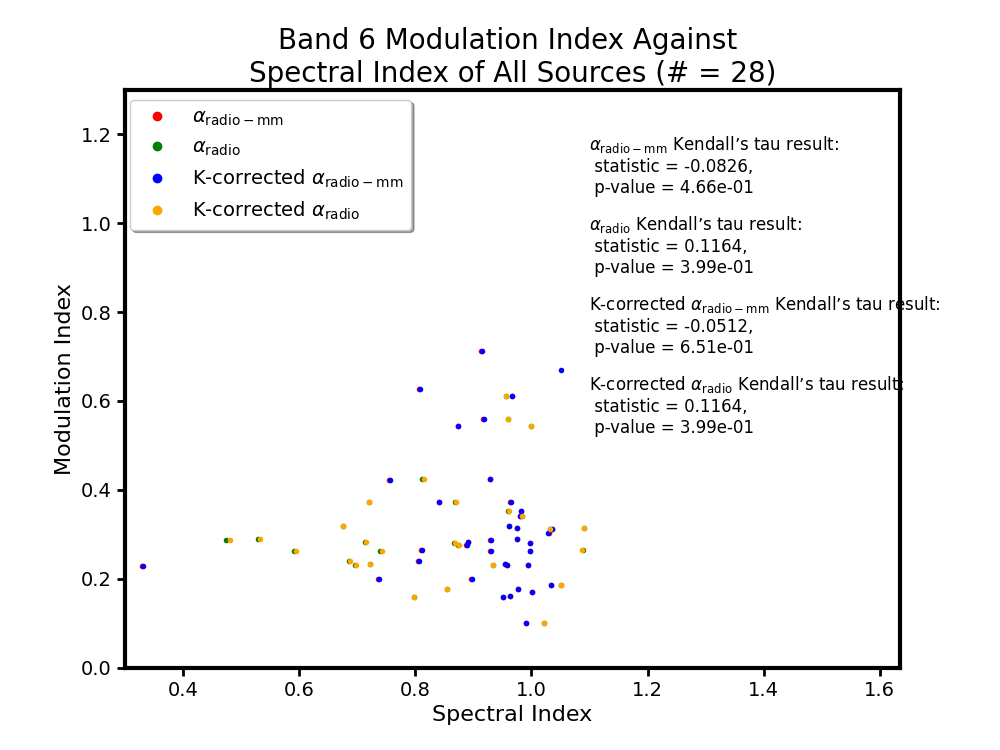

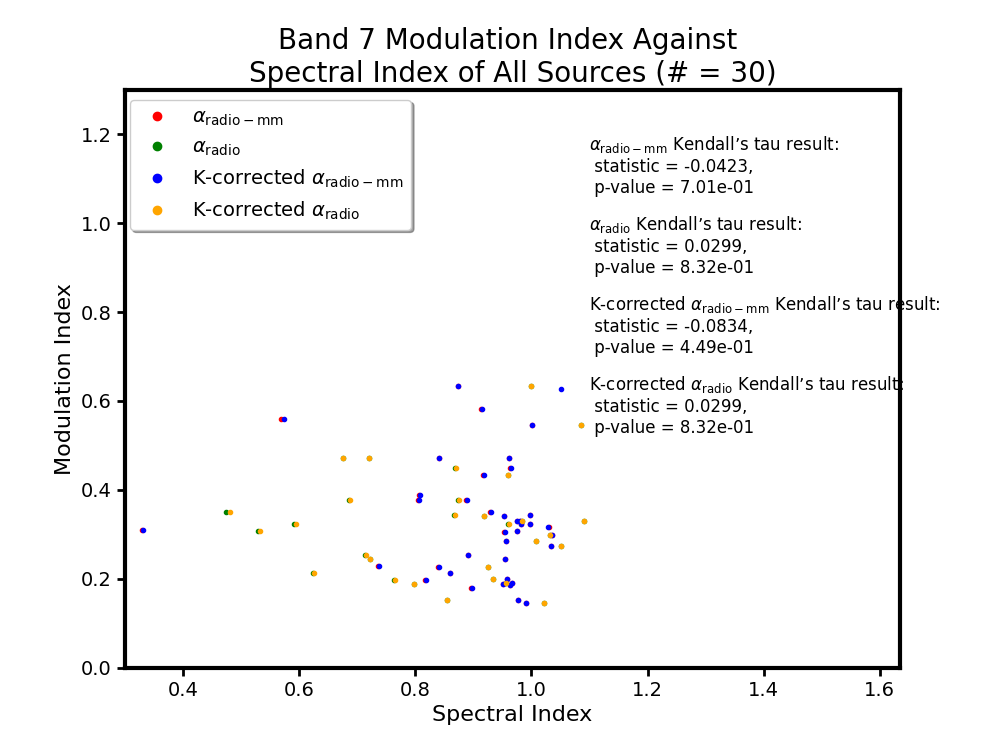

In [148]:
#######################################################################################################
### Modulation index against Spectral index 
#######################################################################################################
spectral_index = [alpha, alphaRad, alphaK, alphaRadK]

modu_index = [modu_index_3, modu_index_6, modu_index_7]

Band_num = [3, 6, 7]
x_axis = [1.17, 1.1, 1.1]
y_axis = [1.2, 1.2, 1.2]
label_name = ['$\\alpha_\mathrm{radio-mm}$', '$\\alpha_\mathrm{radio}$', 'K-corrected $\\alpha_\mathrm{radio-mm}$', 'K-corrected $\\alpha_\mathrm{radio}$' ]

for k in range(0, 3):
    plt.rcParams['figure.figsize'] = [10, 7.5]
    plt.rcParams['axes.linewidth'] = 3    
    fig, ax = plt.subplots()
    
    for j in range(0, 4):
        aa = ~np.isnan(modu_index[k]) & ~np.isnan(spectral_index[j])
        notnan = np.where(aa == True)[0]
    
        notnan_modu_index = modu_index[k][notnan]
        notnan_spec_index = spectral_index[j][notnan]
    
        tau, p = stats.kendalltau(notnan_modu_index,  notnan_spec_index)
    
        ax.plot(notnan_spec_index, notnan_modu_index, '.', c = color[j], markersize = 6, label = label_name[j])
        
        ax.text(x_axis[k], y_axis[k]-0.18*j, label_name[j] + ' Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), 
            verticalalignment = 'top', fontsize = 12)

    ax.set_xlim(0.3, np.nanmax(notnan_spec_index)*1.5)
    ax.set_ylim(0, 1.3)
    plt.xlabel('Spectral Index',  fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.ylabel('Modulation Index',  fontsize = 16)
    plt.yticks(fontsize = 14)
    fig.legend(loc='upper left', bbox_to_anchor = (0.12, 0.88), shadow=True, fontsize = 14, markerscale = 2) 
    plt.title('Band '+str(Band_num[k])+' Modulation Index Against \nSpectral Index of All Sources (# = '+str(len(notnan_spec_index))+')', fontsize = 20) 

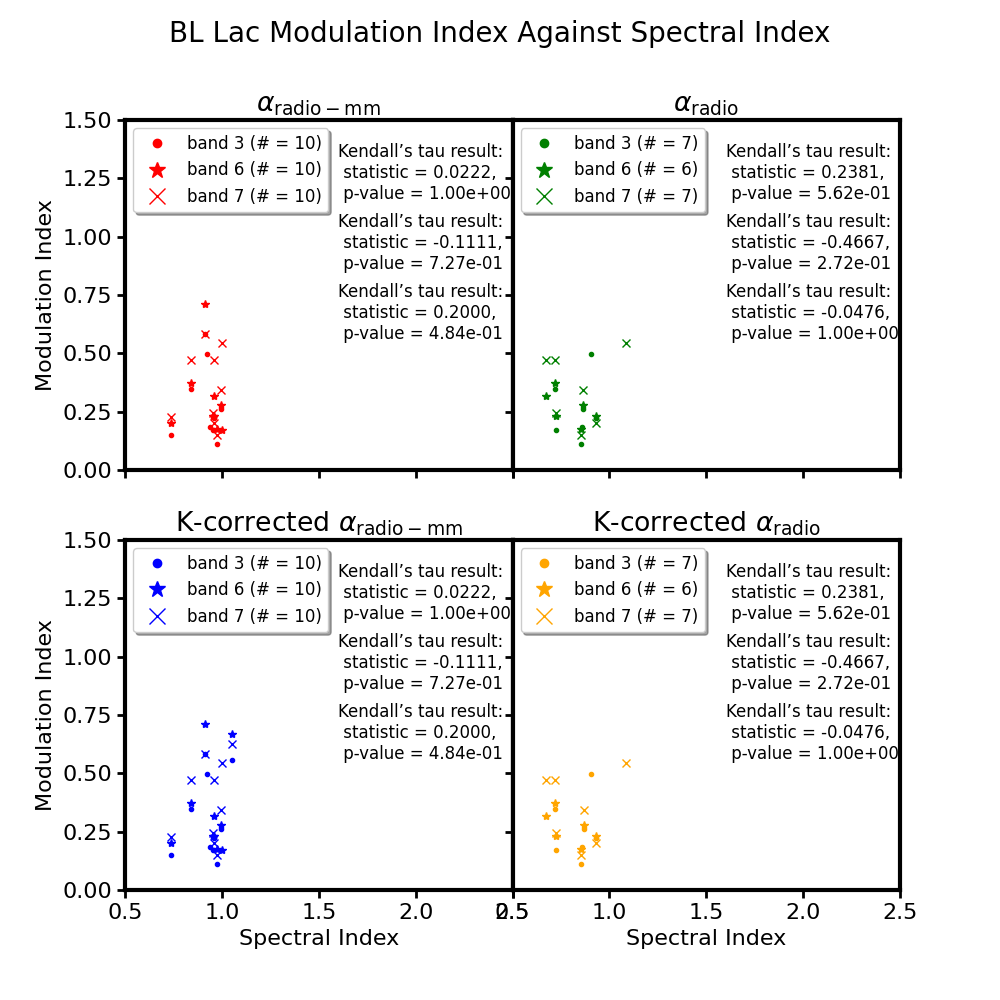

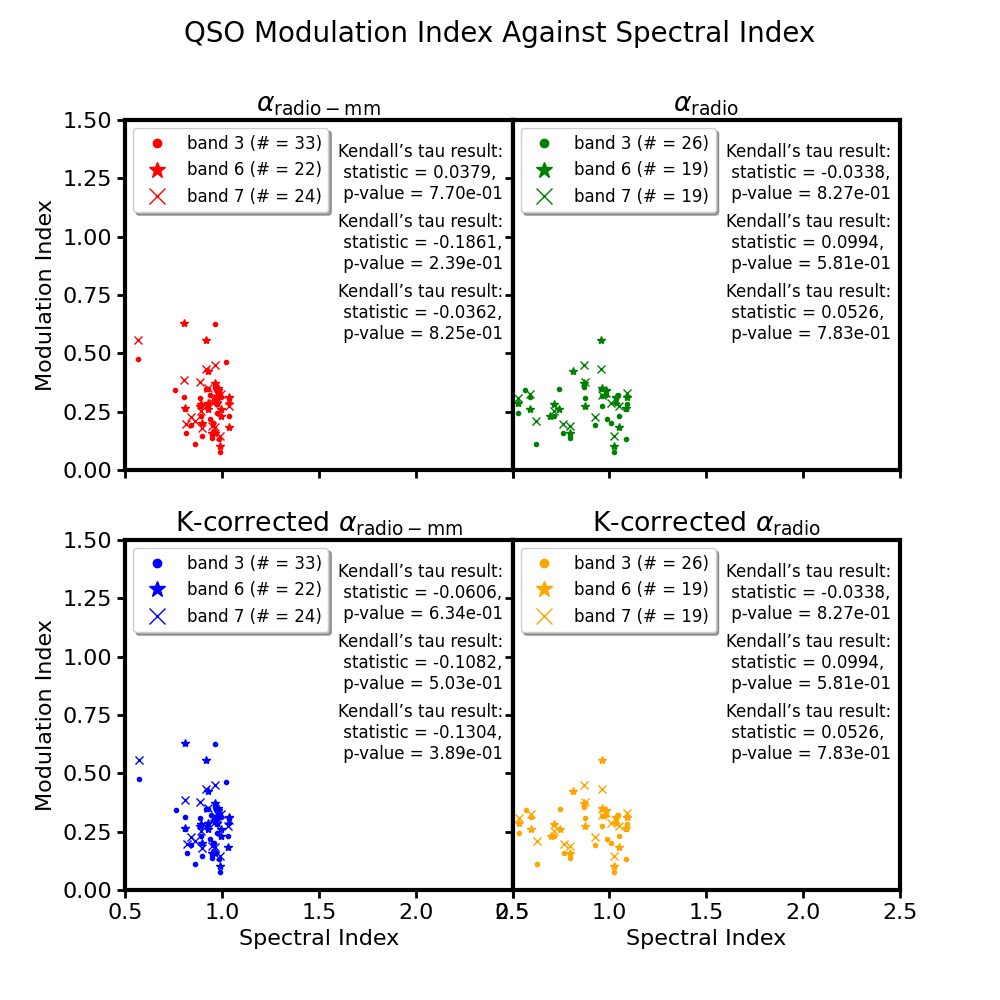

In [150]:
#######################################################################################################
### BL Lac and QSO Modulation index against Spectral index 
#######################################################################################################
BL_Lac = np.hstack([classclassify[1],classclassify[2], classclassify[4]])
QSO = classclassify[3]

BL_Lac_spectral_index = [alpha[BL_Lac], alphaRad[BL_Lac], alphaK[BL_Lac], alphaRadK[BL_Lac]]
QSO_spectral_index = [alpha[QSO], alphaRad[QSO], alphaK[QSO], alphaRadK[QSO]]

spectral_index_array = [BL_Lac_spectral_index, QSO_spectral_index]

BL_Lac_modu_index = [modu_index_3[BL_Lac], modu_index_6[BL_Lac], modu_index_7[BL_Lac]]
QSO_modu_index = [modu_index_3[QSO], modu_index_6[QSO], modu_index_7[QSO]]

modu_index_array = [BL_Lac_modu_index, QSO_modu_index]

Band_num = [3, 6, 7]
y_axis = [1.2, 1.2, 1.2]
class_name = ['BL Lac', 'QSO']
bnad_name = ['band 3', 'band 6', 'band 7']
label_name = ['$\\alpha_\mathrm{radio-mm}$', '$\\alpha_\mathrm{radio}$', 'K-corrected $\\alpha_\mathrm{radio-mm}$', 'K-corrected $\\alpha_\mathrm{radio}$' ]
symbol = ['.', '*', 'x']

for j in range(0, 2):
    modu_index = modu_index_array[j]
    spectral_index = spectral_index_array[j]
    
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.rcParams['axes.linewidth'] = 3
    plt.rc('font', size = 16)    
    mpl.rcParams['xtick.major.size'] = 6
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 6
    mpl.rcParams['ytick.major.width'] = 2
    fig = plt.figure()
    gs = fig.add_gridspec(2, 2, wspace = 0)
    axs = gs.subplots() # , sharey='row'
    
    for k in range(0, 4):
        if k == 0:
            i = 0
            n = 0
        elif k == 1:
            i = 0
            n = 1
        elif k == 2:
            i = 1
            n = 0
        else: 
            i = 1
            n = 1
            
        for m in range(0, 3):
            aa = ~np.isnan(spectral_index[k]) & ~np.isnan(modu_index[m])
            notnan = np.where(aa == True)[0]
    
            notnan_modu_index = modu_index[m].values[notnan]
            notnan_spectral_index = spectral_index[k].values[notnan]
    
            tau, p = stats.kendalltau(notnan_modu_index, notnan_spectral_index)
    
            axs[i,n].plot(notnan_spectral_index, notnan_modu_index, symbol[m], c = color[k], markersize = 6, label = 
                          bnad_name[m]+' (# = '+str(len(notnan_spectral_index))+')')

            axs[i,n].text(1.6, 1.4-0.3*m, 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
            #axs[i,n].text(1.1, 1.4-0.3*m,  label_name[k], verticalalignment = 'top', fontsize = 12)
            
        axs[i,n].set_xlim(0.5, 2.5)
        axs[i,n].set_ylim(0, 1.5)
        axs[i,n].set_title(label_name[k])
    
        axs[i,n].legend(loc = 'upper left', shadow = True,  fontsize = 12, markerscale = 2) 
        
        for ax in axs.flat:
            ax.set(xlabel = 'Spectral Index', ylabel = 'Modulation Index')
            
        for ax in axs.flat:
            ax.label_outer()
    
        figurename = class_name[j] +' Modulation Index Against Spectral Index'
        fig.suptitle(figurename, fontsize = 20)